In [1]:
# Importing all the project pre-rquisites

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns


In [3]:
# Importing dataset using short_name as df1

df1=pd.read_csv("E:/Data/use data/csv/PT_by_type_of_transport.csv")

In [4]:
df1.head()

,Bus,Underground,DLR,Overground
0,189.1,90.5,6.3,0.0
1,181.6,84.5,5.8,0.0
2,175.9,84.3,5.8,0.0
3,183.4,86.5,6.1,0.0
4,160.4,82.9,5.8,0.0


In [5]:
#Checking null values

total_null = df1.isnull().sum()
print("The total number of null values are: " + str(total_null))

The total number of null values are: Bus            0
Underground    0
DLR            0
Overground     0
dtype: int64


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bus          151 non-null    float64
 1   Underground  151 non-null    float64
 2   DLR          151 non-null    float64
 3   Overground   151 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<AxesSubplot:>

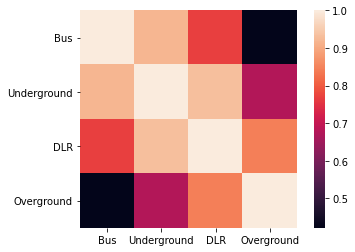

In [7]:
# check correlation of each values

corrmat = df1.corr()
sns.heatmap(corrmat, vmax=1, square=True)

<AxesSubplot:title={'center':'PT_by_type_of_transport'}>

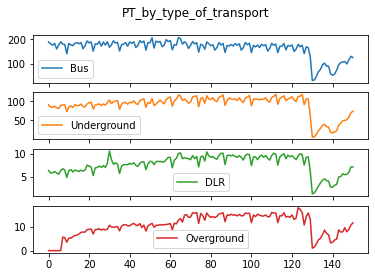

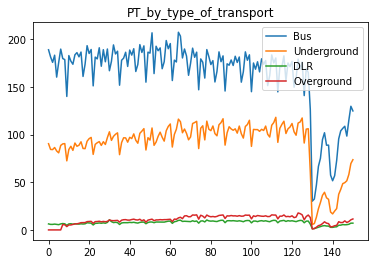

In [8]:
#Visualize the PT_by_type_of_transport data
df1.plot.line(subplots = True, title='PT_by_type_of_transport')
df1.plot(title='PT_by_type_of_transport')

In [9]:
#Drop the high and low columns
df1.drop(['Underground', 'DLR', 'Overground'], axis = 1, inplace = True)
#Drop the bottom 2 columns
df1.drop(df1.tail(2).index,inplace=True)
print(df1)
print(df1.shape)

       Bus
0    189.1
1    181.6
2    175.9
3    183.4
4    160.4
..     ...
144  104.0
145  106.6
146  108.8
147   98.5
148  115.2

[149 rows x 1 columns]
(149, 1)


In [10]:
#Convert the data into numpy array
df1 = df1.to_numpy()
df1

array([[189.1],
       [181.6],
       [175.9],
       [183.4],
       [160.4],
       [175.8],
       [189.8],
       [179.9],
       [178.8],
       [140.1],
       [183. ],
       [177.2],
       [173.9],
       [183.8],
       [186.1],
       [181.7],
       [186.7],
       [161.1],
       [173.9],
       [193.4],
       [185.2],
       [189.4],
       [151.2],
       [181.4],
       [179.5],
       [191.2],
       [171.8],
       [189.2],
       [176.5],
       [189.9],
       [167.1],
       [177. ],
       [194.2],
       [184.7],
       [187.6],
       [151.9],
       [178.1],
       [180.3],
       [186.5],
       [171.6],
       [188.8],
       [183.5],
       [190.2],
       [166.3],
       [173.7],
       [194.5],
       [186.3],
       [193.2],
       [155.1],
       [186.6],
       [185.6],
       [206.9],
       [164.1],
       [192.8],
       [188.1],
       [191.1],
       [169.2],
       [176.5],
       [198.8],
       [190.2],
       [195.6],
       [156.8],
       [

In [11]:
#From the dataset, separate into training and testing data with 80/20 percentile
dataset_train = np.array(df1[:int(df1.shape[0]*0.8)])
dataset_test = np.array(df1[int(df1.shape[0]*0.8):])
#Find number of columns for each dataset
print(dataset_train.shape)
print(dataset_test.shape)

(119, 1)
(30, 1)


In [13]:
#Scale the data to range[0,1]
#MinMaxScalar subtracts the minimum value in each feature and divides by the range(diff
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
train_data = scalar.fit_transform(dataset_train)
train_data.shape

(119, 1)

In [14]:
#Declare the x_train and y_train
x_train = train_data[0:98]
y_train = train_data[1:99]
x_train = np.reshape(x_train, (98,1,1))
x_train.shape

(98, 1, 1)

In [17]:
#importing important libraries
import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
#Instantiate the Sequential model class
model = Sequential()
#Set the number of neurons/nodes with the units parameter
#Return_sequences=True reflects adding more layers
model.add(LSTM(units=98, return_sequences=True, input_shape=(None, 1)))
#Add dropout to reduce over-fitting
model.add(Dropout(0.2))
model.add(LSTM(units=98, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=98, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=98))
model.add(Dropout(0.2))
#Add dense layer to reduce spacial parameters of the vector
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 98)          39200     
                                                                 
 dropout (Dropout)           (None, None, 98)          0         
                                                                 
 lstm_1 (LSTM)               (None, None, 98)          77224     
                                                                 
 dropout_1 (Dropout)         (None, None, 98)          0         
                                                                 
 lstm_2 (LSTM)               (None, None, 98)          77224     
                                                                 
 dropout_2 (Dropout)         (None, None, 98)          0         
                                                                 
 lstm_3 (LSTM)               (None, 98)               

In [18]:
#Compile the model
model.compile(optimizer = 'adam', loss = "mean_squared_error")

In [19]:
#Train the model for 100 epochs with 32 training examples used in each iteration
model.fit(x_train, y_train, epochs = 100, batch_size = 98)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.3661
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3602
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3544
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3484
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3419
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3351
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3285
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3205
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3134
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3052
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2960
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2868
Epoch 13/100
1/1 [==============================] -

In [20]:
#Display the testing dataset
print(dataset_test)
print(dataset_test.shape)

[[171.4]
 [177. ]
 [149.8]
 [159.8]
 [179.3]
 [168.9]
 [176.2]
 [141. ]
 [169.4]
 [165.2]
 [126.4]
 [ 30.2]
 [ 32.5]
 [ 47. ]
 [ 66.7]
 [ 75.2]
 [ 94.8]
 [102. ]
 [ 88.9]
 [ 89. ]
 [ 57.5]
 [ 51.6]
 [ 56.9]
 [ 72.9]
 [ 95.6]
 [104. ]
 [106.6]
 [108.8]
 [ 98.5]
 [115.2]]
(30, 1)


In [27]:
#Reshape the training data and scale
inputs = np.reshape(scalar.transform(dataset_test), (30,1,1))
#Reverse the scaled predictions to their original values
bus_transport_prediction = scalar.inverse_transform(model.predict(inputs))
bus_transport_prediction

array([[177.1935 ],
       [177.9547 ],
       [174.2617 ],
       [175.61781],
       [178.26735],
       [176.85376],
       [177.84593],
       [173.07103],
       [176.9217 ],
       [176.35107],
       [171.10324],
       [158.59726],
       [158.88329],
       [160.70389],
       [163.22214],
       [164.3232 ],
       [166.89156],
       [167.84427],
       [166.11438],
       [166.12753],
       [162.04   ],
       [161.28748],
       [161.96327],
       [164.02444],
       [166.99718],
       [168.10971],
       [168.45526],
       [168.7481 ],
       [167.38057],
       [169.60202]], dtype=float32)

In [28]:
bus_transport_prediction = np.squeeze(bus_transport_prediction)
bus_transport_prediction

array([177.1935 , 177.9547 , 174.2617 , 175.61781, 178.26735, 176.85376,
       177.84593, 173.07103, 176.9217 , 176.35107, 171.10324, 158.59726,
       158.88329, 160.70389, 163.22214, 164.3232 , 166.89156, 167.84427,
       166.11438, 166.12753, 162.04   , 161.28748, 161.96327, 164.02444,
       166.99718, 168.10971, 168.45526, 168.7481 , 167.38057, 169.60202],
      dtype=float32)

In [29]:
bus_transport_prediction = bus_transport_prediction.reshape(-1,1)
bus_transport_prediction

array([[177.1935 ],
       [177.9547 ],
       [174.2617 ],
       [175.61781],
       [178.26735],
       [176.85376],
       [177.84593],
       [173.07103],
       [176.9217 ],
       [176.35107],
       [171.10324],
       [158.59726],
       [158.88329],
       [160.70389],
       [163.22214],
       [164.3232 ],
       [166.89156],
       [167.84427],
       [166.11438],
       [166.12753],
       [162.04   ],
       [161.28748],
       [161.96327],
       [164.02444],
       [166.99718],
       [168.10971],
       [168.45526],
       [168.7481 ],
       [167.38057],
       [169.60202]], dtype=float32)

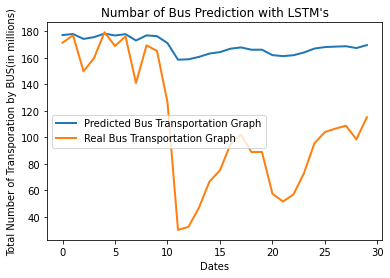

In [32]:
#Graph the real stock prices against the model's prediction

import matplotlib as plt
from matplotlib import pyplot as plt
plt.plot(bus_transport_prediction, label = 'Predicted Bus Transportation Graph', linewidth = 2)
plt.plot(dataset_test, label = 'Real Bus Transportation Graph', linewidth = 2)
plt.title("Numbar of Bus Prediction with LSTM's")
plt.xlabel('Dates')
plt.ylabel('Total Number of Transporation by BUS(in millions)')
plt.legend()
plt.show()

In [8]:
#IQR Usage Rate by BUS

Q1 = np.percentile(df1['Bus'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df1['Bus'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR Usage Rate by BUS:",IQR)
print("Previous shape:",df1.shape)
#Upper bound
upper = np.where(df1['Bus'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df1['Bus'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New Shape:", df1.shape)

IQR Usage Rate by BUS: 24.149999999999977
Previous shape: (151, 4)
New Shape: (132, 4)


In [9]:
#IQR London Underground (includes DLR up to Mar-17)

Q1 = np.percentile(df1['Underground'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df1['Underground'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR Usage Rate by London Underground :",IQR)
print("Previous shape:",df1.shape)
#Upper bound
upper = np.where(df1['Underground'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df1['Underground'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New Shape:", df1.shape)

IQR Usage Rate by London Underground : 15.049999999999997
Previous shape: (132, 4)
New Shape: (131, 4)


In [10]:
#IQR Crime Rate by London DLR

Q1 = np.percentile(df1['DLR'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df1['DLR'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR Usage Rate by London DLR:",IQR)
print("Previous shape:",df1.shape)
#Upper bound
upper = np.where(df1['DLR'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df1['DLR'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New Shape:", df1.shape)

IQR Usage Rate by London DLR: 2.1000000000000005
Previous shape: (131, 4)
New Shape: (131, 4)


In [11]:
#IQR Crime Rate by London overground

Q1 = np.percentile(df1['Overground'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df1['Overground'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR Usage Rate by London Overground:",IQR)
print("Previous shape:",df1.shape)
#Upper bound
upper = np.where(df1['Overground'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df1['Overground'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New Shape:", df1.shape)

IQR Usage Rate by London Overground: 5.15
Previous shape: (131, 4)
New Shape: (124, 4)


In [12]:
#Normalize data

from sklearn import preprocessing 
import numpy as np

a = np.random.random((1,4))
a = a*20
print("Data = ", a)

#Normalize the data attributes
normalized = preprocessing.normalize(a)
print("Normalized Data =", normalized)

Data =  [[ 7.32671697 16.41413839  2.57652251 10.3972852 ]]
Normalized Data = [[0.35014535 0.78443513 0.12313255 0.49688845]]
